In [40]:
# This script will start the cleanup of the Movie data

import seaborn as sns
import math
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
data_folder = './Data/'


In [2]:
movies_metadata = pd.read_csv(data_folder+'movie.metadata.tsv', header=None, sep='\t', names=['wikipedia_ID','freebase_ID','name','release_date', 'box_office_revenue', 'runtime', 'languages', 'countries', 'genre'], parse_dates=True)
movies_metadata.head(5)

,wikipedia_ID,freebase_ID,name,release_date,box_office_revenue,runtime,languages,countries,genre
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [3]:
character_metadata = pd.read_csv(data_folder+'character.metadata.tsv', header=None, sep='\t', names=['wikipedia_ID','freebase_ID','release_date', 'character_name', 'actor_birthday', 'actor_gender', 'actor_height', 'actor_ethnicity', 'actor_name' , 'actor_age','freebase_character_actor_mapID', 'freebase_character_ID', 'freebase_actor_ID' ], parse_dates=True)
character_metadata.head(5)

,wikipedia_ID,freebase_ID,release_date,character_name,actor_birthday,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age,freebase_character_actor_mapID,freebase_character_ID,freebase_actor_ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [4]:
plot_summaries = pd.read_csv(data_folder+'plot_summaries.txt',sep='\t', header=None, names=['wikipedia_ID', 'plot_summary'] )
plot_summaries.head()

,wikipedia_ID,plot_summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


**How many movies do we have?**

In [5]:
number_of_data= movies_metadata.count()
number_of_data

wikipedia_ID          81741
freebase_ID           81741
name                  81741
release_date          74839
box_office_revenue     8401
runtime               61291
languages             81741
countries             81741
genre                 81741
dtype: int64

**Where is data mostly missing ?**

In [6]:
proportion_of_each_data = number_of_data/number_of_data['wikipedia_ID']*100
proportion_of_each_data

wikipedia_ID          100.000000
freebase_ID           100.000000
name                  100.000000
release_date           91.556257
box_office_revenue     10.277584
runtime                74.981955
languages             100.000000
countries             100.000000
genre                 100.000000
dtype: float64

We see that the box office column is a column with a lot of missing data, it is only present for 10% of movies.

Given we will perform our analysis on American movies we will only keep the data for movies from the US

In [7]:
us_movies_metadata = movies_metadata[movies_metadata['countries'].str.contains('United States of America', case=False)].copy()
us_movies_metadata

,wikipedia_ID,freebase_ID,name,release_date,box_office_revenue,runtime,languages,countries,genre
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
5,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen..."
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ..."
10,175026,/m/017n1p,Sarah and Son,1930,NaN,86.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama"", ""/m/01g6gs"": ""Black-an..."
...,...,...,...,...,...,...,...,...,...
81725,1918494,/m/0660qx,State and Main,2000-08-26,6944471.0,106.0,"{""/m/02bjrlw"": ""Italian Language"", ""/m/02h40lc...","{""/m/0f8l9c"": ""France"", ""/m/09c7w0"": ""United S...","{""/m/0gf28"": ""Parody"", ""/m/09n5t_"": ""Americana..."
81726,664006,/m/030xw6,Guilty as Sin,1993-06-04,22886222.0,107.0,{},"{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
81727,24209227,/m/07k5mlk,"The Time, the Place and the Girl",1946,NaN,105.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/05p553"": ""Comedy film"", ""/m/02l7c8"": ""Rom..."
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"


In [8]:
us_movies_metadata['languages'] = us_movies_metadata['languages'].apply(lambda x: list(ast.literal_eval(x).values()))
us_movies_metadata

,wikipedia_ID,freebase_ID,name,release_date,box_office_revenue,runtime,languages,countries,genre
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],"{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],"{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
5,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"[Silent film, English Language]","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen..."
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,[English Language],"{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ..."
10,175026,/m/017n1p,Sarah and Son,1930,NaN,86.0,[English Language],"{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama"", ""/m/01g6gs"": ""Black-an..."
...,...,...,...,...,...,...,...,...,...
81725,1918494,/m/0660qx,State and Main,2000-08-26,6944471.0,106.0,"[Italian Language, English Language]","{""/m/0f8l9c"": ""France"", ""/m/09c7w0"": ""United S...","{""/m/0gf28"": ""Parody"", ""/m/09n5t_"": ""Americana..."
81726,664006,/m/030xw6,Guilty as Sin,1993-06-04,22886222.0,107.0,[],"{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
81727,24209227,/m/07k5mlk,"The Time, the Place and the Girl",1946,NaN,105.0,[English Language],"{""/m/09c7w0"": ""United States of America""}","{""/m/05p553"": ""Comedy film"", ""/m/02l7c8"": ""Rom..."
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,[English Language],"{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"


How many movies did we keep?

In [9]:
print(us_movies_metadata.count())

wikipedia_ID          34408
freebase_ID           34408
name                  34408
release_date          33197
box_office_revenue     6936
runtime               29509
languages             34408
countries             34408
genre                 34408
dtype: int64


In [10]:
print('Total Number of movies', number_of_data.wikipedia_ID)
print('Number of non-US movies', number_of_data.wikipedia_ID - us_movies_metadata.wikipedia_ID.count())
print('Meaning we will be working with',us_movies_metadata.wikipedia_ID.count(), 'movies for our analysis')

Total Number of movies 81741
Number of non-US movies 47333
Meaning we will be working with 34408 movies for our analysis


In [11]:
#Let's remove the dictionaries from the countries and the genre of our data

us_movies_metadata['countries'] = us_movies_metadata['countries'].apply(lambda x: list(ast.literal_eval(x).values()))
us_movies_metadata['genre'] = us_movies_metadata['genre'].apply(lambda x: list(ast.literal_eval(x).values()))

us_movies_metadata

,wikipedia_ID,freebase_ID,name,release_date,box_office_revenue,runtime,languages,countries,genre
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]"
5,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"[Silent film, English Language]",[United States of America],"[Short Film, Silent film, Indie, Black-and-whi..."
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,[English Language],[United States of America],"[Musical, Comedy, Black-and-white]"
10,175026,/m/017n1p,Sarah and Son,1930,NaN,86.0,[English Language],[United States of America],"[Drama, Black-and-white]"
...,...,...,...,...,...,...,...,...,...
81725,1918494,/m/0660qx,State and Main,2000-08-26,6944471.0,106.0,"[Italian Language, English Language]","[France, United States of America]","[Parody, Americana, Comedy]"
81726,664006,/m/030xw6,Guilty as Sin,1993-06-04,22886222.0,107.0,[],[United States of America],"[Thriller, Erotic thriller, Psychological thri..."
81727,24209227,/m/07k5mlk,"The Time, the Place and the Girl",1946,NaN,105.0,[English Language],[United States of America],"[Comedy film, Romance Film, Musical]"
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,[English Language],[United States of America],[Drama]


Let's see what languages we still have in our data

In [12]:
us_movies_metadata["languages"].explode().unique()

array(['English Language', 'Silent film', nan, 'Spanish Language',
       'Greek Language', 'Swahili Language', 'French Language',
       'Standard Mandarin', 'Standard Cantonese', 'Italian Language',
       'Japanese Language', 'American English', 'German Language',
       'Arabic Language', 'Czech Language', 'Slovak Language',
       'Thai Language', 'Portuguese Language', 'Polish Language',
       'Tibetan languages', 'Mandarin Chinese', 'Cantonese',
       'Standard Tibetan', 'Chinese language', 'Swedish Language',
       'Hungarian language', 'Russian Language', 'Dutch Language',
       'Persian Language', 'Irish', 'American Sign Language',
       'Tagalog language', 'Filipino language', 'Xhosa Language',
       'Afrikaans Language', 'Urdu Language', 'Hebrew Language',
       'Tamil Language', 'Latin Language', 'Turkish Language',
       'Hindi Language', 'Serbo-Croatian', 'Croatian language',
       'Serbian language', 'Kannada Language', 'Punjabi language',
       'Bengali Langu

Of interest for us are: English Language, Silent Film, American English, Old English Language (for example Indian English is not very relevant for our analysis, as well as native american languages like Navajo or Hawaiian language). Question for the group, do we keep American Sign Language movies? So let us remove any movie that doesn't have English Language, Silent Film, American English or Old English Language as one of their language

In [13]:
us_english_movies_metadata = us_movies_metadata[movies_metadata['languages'].str.contains('English Language' or 'Silent Film' or 'American English' or 'Old English Language', case=False)].copy()
us_english_movies_metadata

/var/folders/my/4hvdfxj10f94l0xh5rd30q_h0000gn/T/ipykernel_95062/3760038286.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  us_english_movies_metadata = us_movies_metadata[movies_metadata['languages'].str.contains('English Language' or 'Silent Film' or 'American English' or 'Old English Language', case=False)].copy()


,wikipedia_ID,freebase_ID,name,release_date,box_office_revenue,runtime,languages,countries,genre
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]"
5,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"[Silent film, English Language]",[United States of America],"[Short Film, Silent film, Indie, Black-and-whi..."
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,[English Language],[United States of America],"[Musical, Comedy, Black-and-white]"
10,175026,/m/017n1p,Sarah and Son,1930,NaN,86.0,[English Language],[United States of America],"[Drama, Black-and-white]"
...,...,...,...,...,...,...,...,...,...
81721,34474142,/m/0cpy07r,Frontier Fury,1943-06-24,NaN,55.0,[English Language],[United States of America],[Western]
81725,1918494,/m/0660qx,State and Main,2000-08-26,6944471.0,106.0,"[Italian Language, English Language]","[France, United States of America]","[Parody, Americana, Comedy]"
81727,24209227,/m/07k5mlk,"The Time, the Place and the Girl",1946,NaN,105.0,[English Language],[United States of America],"[Comedy film, Romance Film, Musical]"
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,[English Language],[United States of America],[Drama]


Did we remove any movies by doing that?

In [14]:
print('We had',us_movies_metadata.wikipedia_ID.count(), 'movies in our U.S data frame')
print('We now have', us_english_movies_metadata.wikipedia_ID.count(), 'in our English US data frame')
print('So there are',us_movies_metadata.wikipedia_ID.count()-us_english_movies_metadata.wikipedia_ID.count(), 'movies that were from the US but not in any of the languages we decided to consider' )

We had 34408 movies in our U.S data frame
We now have 30528 in our English US data frame
So there are 3880 movies that were from the US but not in any of the languages we decided to consider


**Small alternative:** keep movies that have NaN as languages to complement it potentially later:

In [15]:
# of course this can be modified if we decide to keep more languages
languages_to_keep = ['English Language', 'Silent Film','American English','Old English Language']

us_english_movie_with_nan_metadata = us_movies_metadata[us_movies_metadata['languages'].apply(lambda x: any(lang in x for lang in languages_to_keep) or len(x) == 0)]
us_english_movie_with_nan_metadata

,wikipedia_ID,freebase_ID,name,release_date,box_office_revenue,runtime,languages,countries,genre
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]"
5,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"[Silent film, English Language]",[United States of America],"[Short Film, Silent film, Indie, Black-and-whi..."
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,[English Language],[United States of America],"[Musical, Comedy, Black-and-white]"
10,175026,/m/017n1p,Sarah and Son,1930,NaN,86.0,[English Language],[United States of America],"[Drama, Black-and-white]"
...,...,...,...,...,...,...,...,...,...
81725,1918494,/m/0660qx,State and Main,2000-08-26,6944471.0,106.0,"[Italian Language, English Language]","[France, United States of America]","[Parody, Americana, Comedy]"
81726,664006,/m/030xw6,Guilty as Sin,1993-06-04,22886222.0,107.0,[],[United States of America],"[Thriller, Erotic thriller, Psychological thri..."
81727,24209227,/m/07k5mlk,"The Time, the Place and the Girl",1946,NaN,105.0,[English Language],[United States of America],"[Comedy film, Romance Film, Musical]"
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,[English Language],[United States of America],[Drama]


In [16]:
print('While we kept', us_english_movies_metadata.wikipedia_ID.count(), 'movies in our dataframe by removing movies that had no language provided, we keep',us_english_movie_with_nan_metadata.wikipedia_ID.count(), 'by keeping those movies. Thereby, only removing', us_movies_metadata.wikipedia_ID.count() - us_english_movie_with_nan_metadata.wikipedia_ID.count(), 'movies.' )

While we kept 30528 movies in our dataframe by removing movies that had no language provided, we keep 34076 by keeping those movies. Thereby, only removing 332 movies.


**Now let us have a look at the genres we have in our dataset**

In [17]:
us_movies_metadata["genre"].explode().unique()

array(['Thriller', 'Science Fiction', 'Horror', 'Adventure',
       'Supernatural', 'Action', 'Space western', 'Mystery',
       'Biographical film', 'Drama', 'Crime Drama', 'Short Film',
       'Silent film', 'Indie', 'Black-and-white', 'Comedy', 'Musical',
       'Romantic comedy', 'Ensemble Film', 'Comedy-drama',
       'Romantic drama', 'Romance Film', 'Animation', 'Fantasy',
       'Family Film', "Children's/Family", "Children's Fantasy",
       'Future noir', 'Erotic thriller', 'Film adaptation',
       'Crime Fiction', 'Coming of age', 'Psychological thriller',
       'Suspense', 'Crime Thriller', 'Black comedy', 'Marriage Drama',
       'Western', 'Parody', 'Mockumentary', 'Fan film', 'War film',
       'Epic', 'Biopic [feature]', 'Historical Epic', 'Sports',
       'Family Drama', 'Action/Adventure', 'Costume drama',
       'Historical fiction', 'Culture & Society', 'Biography',
       'Documentary', 'Christmas movie', 'Television movie',
       'Action Comedy', 'Cult', 'Blaxp

As we can see we have a massive amount (342) of genres, so at some point we will need to filter or chose certain genres to analyze.

**Plot of the number of movies per year**

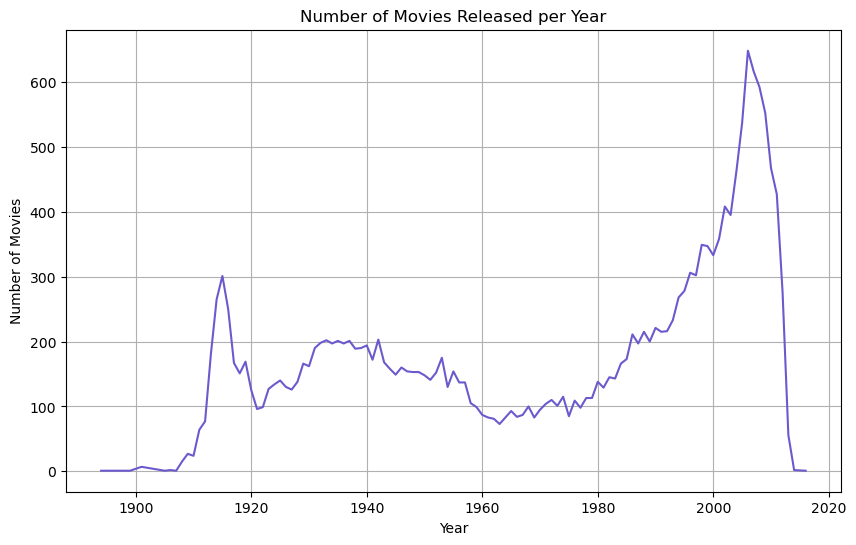

In [18]:
# Let us first exclude movies that have an unknown release date (this is only for the sake of this plot, we will complement later if needed)
movies = us_english_movie_with_nan_metadata.dropna(subset=['release_date']).copy()
movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')

# Group movies by release year
movies_grouped_by_year = movies.groupby(movies['release_date'].dt.year)

#number of movies per year
number_movies_per_year = movies_grouped_by_year.size()

plt.figure(figsize=(10, 6))
number_movies_per_year.plot(kind='line', color = 'slateblue')
plt.title('Number of Movies Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

### Removing adult films

As they do not add any value to our analysis and to prevent us from having to have to deal with pornographic content we remove these movies. As this only concerns 158 entries this should not have a negative effect on our analysis.

In [22]:
porn_genres=['Softcore Porn','Gay pornography','Hardcore pornography','Pornography','Pornographic movie','Adult']
porn_movies=us_english_movies_metadata[us_english_movies_metadata['genre'].apply(lambda genre_list: any(item in genre_list for item in porn_genres))]
us_english_movies_metadata=us_english_movies_metadata[~us_english_movies_metadata["wikipedia_ID"].isin(porn_movies.wikipedia_ID.values)]

## More detailled analysis of genres

We first look at many times each genre occurs

In [21]:
genres_flat=[item for sublist in us_english_movies_metadata["genre"].values for item in sublist]
genres_count=Counter(genres_flat)
genres_count

Counter({'Drama': 12010,
         'Comedy': 9153,
         'Black-and-white': 5941,
         'Indie': 5131,
         'Thriller': 4503,
         'Short Film': 4466,
         'Romance Film': 4135,
         'Action': 4103,
         'Crime Fiction': 3313,
         'Silent film': 3007,
         'Action/Adventure': 2814,
         'Adventure': 2809,
         'Horror': 2742,
         'Family Film': 2512,
         'Documentary': 2406,
         'Science Fiction': 1786,
         'Romantic comedy': 1717,
         'Mystery': 1683,
         'Musical': 1612,
         'Western': 1590,
         'Animation': 1563,
         'Fantasy': 1357,
         'Crime Thriller': 1334,
         'Romantic drama': 1323,
         'War film': 1100,
         'Film adaptation': 1078,
         'Comedy-drama': 1025,
         'Period piece': 987,
         'Biography': 900,
         'Psychological thriller': 881,
         'Comedy film': 812,
         'Teen': 765,
         'Sports': 735,
         "Children's/Family": 729,
     

## Genres preprocessing

We can see that there are many genres contained in the database. However they are not uniform, some are very broad (_e.g._ Drama) while some are very precise (_e.g._ Women in prison films). Additionnaly some of the "genres" are in reality not movie genres but rather tyoes of movies such as "Black and white" or "Short films". We therefore have to determine a list of genres we want to keep and recategorize some movies to these new genres. We make a first list with the common genres which we then modify

| Name                   | Number of occurences | Note                                                                 |
|------------------------|----------------------|----------------------------------------------------------------------|
| Drama                  | 12010                |                                                                      |
| Comedy                 | 9153                 |                                                                      |
| Indie                  | 5131                 |                                                                      |
| Thriller               | 4502                 |                                                                      |
| Romance Film           | 4135                 |                                                                      |
| Action                 | 4103                 |                                                                      |
| Crime Fiction          | 3313                 | Merge with crime thriller into new Crime genre                       |
| Action/Adventure       | 2814                 | Has to be merged with action and adventure                           |
| Adventure              | 2809                 |                                                                      |
| Horror                 | 2742                 |                                                                      |
| Family Film            | 2512                 |                                                                      |
| Documentary            | 2406                 |                                                                      |
| Science Fiction        | 1786                 |                                                                      |
| Romantic comedy        | 1717                 |                                                                      |
| Mystery                | 1683                 |                                                                      |
| Musical                | 1612                 |                                                                      |
| Western                | 1590                 |                                                                      |
| Animation              | 1563                 |                                                                      |
| Fantasy                | 1357                 |                                                                      |
| Crime Thriller         | 1334                 | Add Thriller genre if not present yet                                |
| Romantic drama         | 1323                 | Has to be merged with Romantic and Drama                             |
| War film               | 1100                 |                                                                      |
| Film adaptation        | 1078                 |                                                                      |
| Comedy-drama           | 1025                 | Has to be merged with comedy and drama                                  |
| Biography              | 900                  |                                                                      |
| Psychological thriller | 881                  |                                                                      |
| Comedy film            | 812                  | Same as comedy, has to be merged with it                             |
| Teen                   | 765                  |                                                                      |
| Sports                 | 735                  |                                                                      |
| Children's/Family      | 729                  |                                                                      |
| Parody                 | 723                  |                                                                      |
| Black comedy           | 642                  | Add Comedy if not present yet                                        |
| Family Drama           | 590                  |                                                                      |
| Biographical film      | 589                  | Same as Biography, has to be merged with it                          |
| Cult                   | 580                  |                                                                      |
| LGBT                   | 575                  |                                                                      |
| Coming of age          | 571                  |                                                                      |
| Slapstick              | 527                  |                                                                      |
| Music                  | 484                  |                                                                      |
| Culture & Society      | 466                  |                                                                      |
| Melodrama              | 430                  |                                                                      |
| Supernatural           | 418                  |                                                                      |
| History                | 416                  |                                                                      |
| Biopic [feature]       | 414                  | Same as Biography, has to be merged with it                          |
| Satire                 | 413                  |                                                                      |
| Political drama        | 373                  | Add Drama Genre if not present yet                                   |
| Action Thrillers       | 366                  | Merge with Thriller                                |
| Children's             | 348                  | Merge with Children's/Family                                         |
| Costume drama          | 340                  | Merge with Drama                                                     |
| Crime Drama            | 325                  | Add Drama if not present yet & merge into Crime category             |
| Spy                    | 285                  |                                                                      |
| Superhero movie        | 237                  | Merge with Superhero <br>(we keep the Superhero name for simplicity) |
| Superhero              | 108                  |                                                                      |

Our final dataset will therefore only contain these genres. For a large majority of movies the other genres can simply be removed and no further action has to be taken. However for two categories of movie specific processing has to be done:
- Movies where none of their genres are contained in the list above
- Movies with no genres listed

We first implement the list of genres we keep and those we do not keep in the notebook

In [23]:
genres_to_keep=['Drama','Comedy','Indie','Thriller','Romance Film','Action','Crime Fiction','Action/Adventure','Adventure','Horror','Family Film','Documentary','Science Fiction','Romantic comedy','Mystery','Western','Musical','Animation','Fantasy','Crime Thriller','Romantic drama','War film','Film adaptation','Comedy-drama','Biography','Psychological thriller','Comedy film','Teen','Sports',"Children's/Family",'Parody','Black comedy','Family Drama','Biographical film','Cult','LGBT','Coming of age','Slapstick','Music','Culture & Society','Melodrama','Supernatural','History','Biopic [feature]','Satire','Political drama','Action Thrillers',"Children's",'Costume drama','Crime Drama','Spy','Superhero']
genres_to_remove=[item for item in list(genres_count) if item not in genres_to_keep]

### Movies where none of their genres are contained in the list above

We define a function which searches for these movies. This function finds all movies where none of their genres are contained in the lsit of genres we want to keep.

In [24]:
def no_genres_in_list(genres,df=us_english_movies_metadata,print_=False):
    ID_no_accepted_genre=[]
    for index,row in us_english_movies_metadata.iterrows():
        ID=row['wikipedia_ID']
        genre=row['genre']
        if all(element in genres for element in genre) and genre!=[]:
            if (print_):
                print(us_english_movies_metadata[us_english_movies_metadata['wikipedia_ID']==ID].name,us_english_movies_metadata[us_english_movies_metadata['wikipedia_ID']==ID].genre)
            ID_no_accepted_genre.append(ID)
    print("Number of movies : ",len(ID_no_accepted_genre))
    return ID_no_accepted_genre

In [25]:
foo=no_genres_in_list(genres_to_remove);

Number of movies :  713


In [26]:
uniquegenres_df = us_english_movies_metadata[us_english_movies_metadata['wikipedia_ID'].isin(foo)]
uniquegenres_flat=[item for sublist in uniquegenres_df["genre"].values for item in sublist]
uniquegenres_count=Counter(uniquegenres_flat)
uniquegenres_count

Counter({'Short Film': 380,
         'Black-and-white': 180,
         'Silent film': 140,
         'Propaganda film': 37,
         'Film noir': 27,
         'Concert film': 16,
         'Experimental film': 10,
         'Christian film': 9,
         'Japanese Movies': 9,
         'Superhero movie': 8,
         'Avant-garde': 8,
         'Pre-Code': 7,
         'Animated cartoon': 6,
         'Computer Animation': 6,
         'Martial Arts Film': 6,
         'Musical comedy': 5,
         'Surrealism': 4,
         'Swashbuckler films': 4,
         'Christmas movie': 4,
         'Rockumentary': 4,
         'Historical fiction': 4,
         'Slasher': 3,
         'Blaxploitation': 3,
         'Sponsored film': 3,
         'Historical drama': 3,
         'Detective': 3,
         'Erotica': 3,
         'Mockumentary': 3,
         'Television movie': 3,
         'Art film': 2,
         'Stop motion': 2,
         'Chinese Movies': 2,
         'Historical Epic': 2,
         'Fan film': 2,
     

The only genres which appear a significant number of times are Silent film , black & white and silent films. All three are not real movie genres but rather describe movie type. We still keep them and add them to the list of genres. We than take the rest of the genres and assign them to new categories if possible (_e.g_ Film noir to crime and drama , Mockumentary to documentary) or otherwise removing them. To remove them we remove their genre and they will then be removed when removing the movies with no genres    
-->Explain why we remove so many

In [27]:
genres_to_keep.append(['Short Film','Black-and-white','Silent film'])
genres_to_remove=[item for item in list(genres_count) if item not in genres_to_keep]

We define a dictionary to determine the equivalences

In [29]:
genre_equivalence={
 'Film noir':[],
 'Propaganda film':[],
 'Art film':[],
 'Slasher':['Horror'],
 'Concert film':[],
 'Stop motion':[],
 'Blaxploitation':[],
 'Pre-Code':[],
 'Hip hop movies':[],
 'Chinese Movies':[],
 'World cinema':[],
 'Sponsored film':[],
 'Animated cartoon':['Animation'],
 'Christian film':[],
 'Japanese Movies':[],
 'Surrealism':[],
 'Swashbuckler films':['Adventure'],
 'Superhero movie':['Superhero'],
 'Historical drama':['Drama'],
 'Christmas movie':[],
 'Rockumentary':['Documentary'],
 'Computer Animation':['Animation'],
 'Auto racing':[],
 'Experimental film':[],
 'Avant-garde':[],
 'Dance':[],
 'Historical Epic':[],
 'Historical fiction':[],
 'Detective fiction':[],
 'Comedy horror':['Comedy','Horror'],
 'Detective':[],
 'Erotica':[],
 'Foreign legion':[],
 'Mockumentary':['Documentary'],
 'Fan film':[],
 'Martial Arts Film':[],
 'Dogme 95':[],
 'Musical comedy':['Comedy'],
 'Sword and sorcery':[],
 'Suspense':[],
 'Anime':[],
 'Filipino Movies':[],
 'Period piece':[],
 'Screwball comedy':['Comedy'],
 'Singing cowboy':[],
 'Northern':[],
 'Television movie':[],
 'Time travel':[],
 'Disaster':[],
 'Anti-war':[],
 'Religious Film':[],
 'Punk rock':[],
 'Exploitation':[],
 'Computers':[],
 'Business':[],
 'Sexploitation':[],
 'Gay Interest':[],
 'Gay':[],
 'Gay Themed':[],
 'Outlaw biker film':[],
 'Sci-Fi Horror':['Horror','Science Fiction'],
 'Race movie':[],
 'Educational':[],
'Crime Fiction':['Crime'],
'Action/Adventure':['Action','Adventure'],
    'Romantics drama':['Romantic','Drama'],
    'Comedy-drama':['Comedy','Drama'],
    'Comedy-film':['Comedy'],
    'Biographical film':['Biography'],
    'Biopic [feature]':['Biography'],
    "Children's":["Children's/Family"],
    'Crime Drama':['Drama','Crime'],
    'Superhero movie':['Superhero'],
    'Crime Thriller':['Crime','Thriller'],
    'Action Thrillers':['Thriller']
}

We can then use this equivalence table to remove the unwanted genres

In [30]:
us_english_movies_metadata_new_genres=us_english_movies_metadata.copy(deep=True)
def replace_elements_in_list(lst):
    return [replacement for item in lst for replacement in genre_equivalence.get(item, [item])]
us_english_movies_metadata_new_genres['genre'] = us_english_movies_metadata_new_genres['genre'].apply(replace_elements_in_list)

In [31]:
us_english_movies_metadata_new_genres

,wikipedia_ID,freebase_ID,name,release_date,box_office_revenue,runtime,languages,countries,genre
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Mystery, Biography, Drama, Drama, Crime]"
5,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"[Silent film, English Language]",[United States of America],"[Short Film, Silent film, Indie, Black-and-whi..."
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,[English Language],[United States of America],"[Musical, Comedy, Black-and-white]"
10,175026,/m/017n1p,Sarah and Son,1930,NaN,86.0,[English Language],[United States of America],"[Drama, Black-and-white]"
...,...,...,...,...,...,...,...,...,...
81721,34474142,/m/0cpy07r,Frontier Fury,1943-06-24,NaN,55.0,[English Language],[United States of America],[Western]
81725,1918494,/m/0660qx,State and Main,2000-08-26,6944471.0,106.0,"[Italian Language, English Language]","[France, United States of America]","[Parody, Americana, Comedy]"
81727,24209227,/m/07k5mlk,"The Time, the Place and the Girl",1946,NaN,105.0,[English Language],[United States of America],"[Comedy film, Romance Film, Musical]"
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,[English Language],[United States of America],[Drama]


We now also the modification where we add the genres if not present yet , we do not care bout duplicates as we will remove them in a later step

In [32]:
genre_equivalence_add={
    'Crime Thriller':['Crime','Thriller'],
    'Black comedy':['Comedy'],
    'Political drama':['Drama'],
    'Crime Drama':['Crime','Drama']
}

In [33]:
def add_entries_to_list(lst):
    return lst + [entry for item in lst for entry in genre_equivalence_add.get(item, [])]
us_english_movies_metadata_new_genres['genre'] = us_english_movies_metadata_new_genres['genre'].apply(add_entries_to_list)

We now redefine the list of accepted genres and use them to remove all unwanted genres

In [34]:
genres_to_keep=['Drama','Comedy','Indie','Thriller','Romance Film','Action','Adventure','Horror','Family Film','Documentary','Science Fiction','Romantic comedy','Mystery','Musical','Western','Animation','Fantasy','War film','Film adaptation','Biography','Psychological thriller','Teen','Sports',"Children's/Family",'Parody','Black comedy','Family Drama','Biographical film','Cult','LGBT','Coming of age','Slapstick','Music','Culture & Society','Melodrama','Supernatural','History','Satire','Political drama','Spy','Superhero',]

In [35]:
def filter_elements_in_list(lst):
    return [item for item in lst if item in genres_to_keep]

us_english_movies_metadata_new_genres['genre']=us_english_movies_metadata_new_genres['genre'].apply(filter_elements_in_list)

### Missing genres

We now remove all entries with missing genres. As this concerns few movies and genres are an important part of our analysis it is more viable to remove this little amount of movies

In [36]:
us_english_movies_metadata_new_genres=us_english_movies_metadata_new_genres[us_english_movies_metadata_new_genres['genre'].apply(lambda x : len(x)!=0)]
us_english_movies_metadata_new_genres

,wikipedia_ID,freebase_ID,name,release_date,box_office_revenue,runtime,languages,countries,genre
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Mystery, Biography, Drama, Drama]"
5,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"[Silent film, English Language]",[United States of America],"[Indie, Comedy]"
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,[English Language],[United States of America],"[Musical, Comedy]"
10,175026,/m/017n1p,Sarah and Son,1930,NaN,86.0,[English Language],[United States of America],[Drama]
...,...,...,...,...,...,...,...,...,...
81721,34474142,/m/0cpy07r,Frontier Fury,1943-06-24,NaN,55.0,[English Language],[United States of America],[Western]
81725,1918494,/m/0660qx,State and Main,2000-08-26,6944471.0,106.0,"[Italian Language, English Language]","[France, United States of America]","[Parody, Comedy]"
81727,24209227,/m/07k5mlk,"The Time, the Place and the Girl",1946,NaN,105.0,[English Language],[United States of America],"[Romance Film, Musical]"
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,[English Language],[United States of America],[Drama]


### Removing duplicates

From the analysis above we know that some duplicates have occured , we therefore remove them

In [37]:
us_english_movies_metadata_new_genres['genre']=us_english_movies_metadata_new_genres['genre'].apply(lambda x: list(set(x)))

/var/folders/my/4hvdfxj10f94l0xh5rd30q_h0000gn/T/ipykernel_95062/1842895386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_english_movies_metadata_new_genres['genre']=us_english_movies_metadata_new_genres['genre'].apply(lambda x: list(set(x)))


In [39]:
#us_english_movies_metadata_new_genres.to_csv('new_genres.csv')